## TAXI

In [1]:
import gym
import plotting

In [2]:
env = gym.make("Taxi-v2").env
env.render()

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



## Q-Learning

#### Optimistic initialization ?  q = rmax /1-Y

In [4]:
import numpy as np
q_table = np.zeros([env.observation_space.n, env.action_space.n])

import random
from IPython.display import clear_output

# Hyperparameters
alpha, alpha_in = 0.7, 0.7
gamma = 0.6
epsilon, epsilon_in = 0.5, 0.5
episodes = 1000

# For plotting metrics
all_epochs = []
all_penalties = []

stats = plotting.EpisodeStats(
        episode_lengths=np.zeros(episodes),
        episode_rewards=np.zeros(episodes))

for i in range(1, episodes):
    state = env.reset()

    epochs, penalties, reward, = 0, 0, 0
    done = False
    
    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(q_table[state]) # Exploit learned values

        next_state, reward, done, info = env.step(action) 
        
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        
        stats.episode_rewards[i] += reward
        stats.episode_lengths[i] = epochs
        
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value

        if reward == -10:
            penalties += 1

        state = next_state
        epochs += 1
        
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")
        print(f"Alpha: {alpha}")
        print(f"epsilon: {epsilon}")
        print(f"gamma: {gamma}")
        
    if i % 1000 == 0:
        alpha *= alpha_in
        epsilon *= epsilon_in
        print(f"Alpha: {alpha}")
        print(f"epsilon: {epsilon}")
        print(f"gamma: {gamma}")
        

print("Training finished.\n")

Episode: 500
Alpha: 0.7
epsilon: 1
gamma: 0.6


KeyboardInterrupt: 

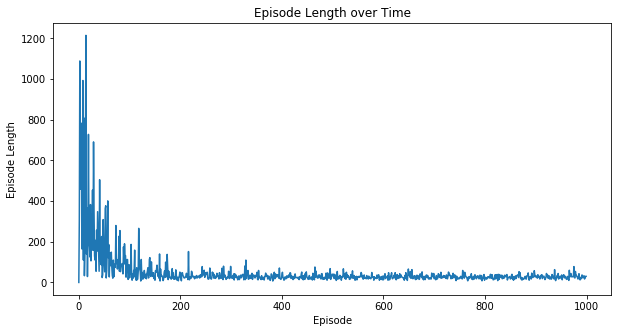

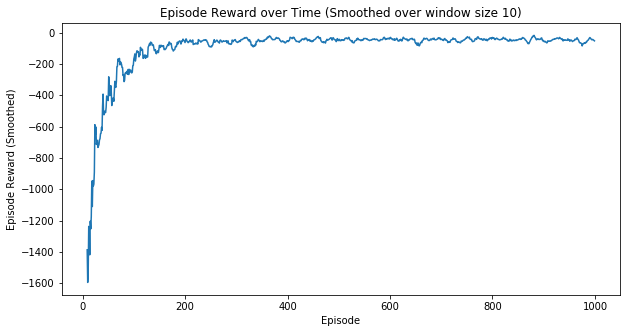

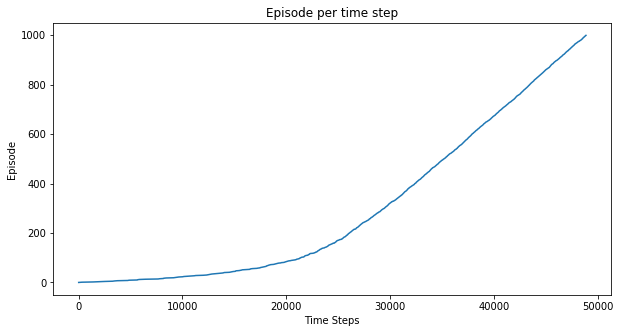

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [37]:
plotting.plot_episode_stats(stats)

In [43]:
"""Evaluate agent's performance after Q-learning"""

total_epochs, total_penalties = 0, 0
episodes = 100

for _ in range(episodes):
    state = env.reset()
    epochs, penalties, reward = 0, 0, 0
    
    done = False
    
    while not done:
        action = np.argmax(q_table[state])
        state, reward, done, info = env.step(action)

        if reward == -10:
            penalties += 1

        epochs += 1

    total_penalties += penalties
    total_epochs += epochs
    clear_output(wait=True)
    print(f"Episode: {_}")
    
print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")

Episode: 99
Results after 100 episodes:
Average timesteps per episode: 12.95
Average penalties per episode: 0.0


Q-learning is one of the easiest Reinforcement Learning algorithms. The problem with Q-Learning however is, once the number of states in the environment are very high, it becomes difficult to implement them with Q table as the size would become very, very large. State of the art techniques uses Deep neural networks instead of the Q-table (Deep Reinforcement Learning). The neural network takes in state information and actions to the input layer and learns to output the right action over the time. Deep learning techniques (like Convolutional Neural Networks) are also used to interpret the pixels on the screen and extract information out of the game (like scores), and then letting the agent control the game.

## SARSA

In [ ]:
Policy evaluation Sarsa, Q ≈ qπ
Policy improvement -greedy policy improvement

In [42]:
import numpy as np
q_table = np.zeros([env.observation_space.n, env.action_space.n])
e_table = np.zeros([env.observation_space.n, env.action_space.n]) 

import random
from IPython.display import clear_output

# Hyperparameters
alpha, alpha_in = 0.3, 0.3
gamma, gamma_in = 0.99, 0.99
epsilon, epsilon_in = 0.4, 0.4
lamda = 0.5
episodes = 50000


# For plotting metrics
all_epochs = []
all_penalties = []

stats = plotting.EpisodeStats(
        episode_lengths=np.zeros(episodes),
        episode_rewards=np.zeros(episodes))

for i in range(1, episodes):
    state = env.reset()

    epochs, penalties, reward, = 0, 0, 0
    done = False
    
    if random.uniform(0, 1) < epsilon:
        action = env.action_space.sample() # Explore action space
    else:
        action = np.argmax(q_table[state]) # Exploit learned values
    
    while not done:

        next_state, reward, done, info = env.step(action)
        stats.episode_rewards[i] += reward
        stats.episode_lengths[i] = epochs
        
        if random.uniform(0, 1) < epsilon:
            next_action = env.action_space.sample() # Explore action space
        else:
            next_action = np.argmax(q_table[next_state]) # Exploit learned values      
        
        e_table[state, action] += 1
        old_value = q_table[state, action]
        new_value = q_table[next_state, next_action]
        
        td_error = (reward + gamma * new_value) - old_value
        q_table = q_table + alpha*td_error*e_table
        e_table = e_table*gamma*lamda
        

        if reward == -10:
            penalties += 1
        
        action = next_action
        state = next_state
        epochs += 1
        
    if i % 10 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")
        print(f"Alpha: {alpha}")
        print(f"epsilon: {epsilon}")
        print(f"gamma: {gamma}")
        
    if i % 10000 == 0:
        if alpha > 0.005:
            alpha *= alpha_in
        if epsilon > 0.05:
            epsilon *= epsilon_in
        
    if i % 20000 == 0:
        gamma *= gamma_in
    
print("Training finished.\n")

Episode: 49990
Alpha: 0.00243
epsilon: 0.025600000000000008
gamma: 0.9702989999999999
Training finished.



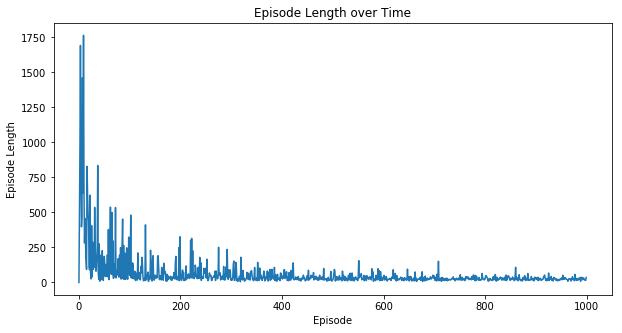

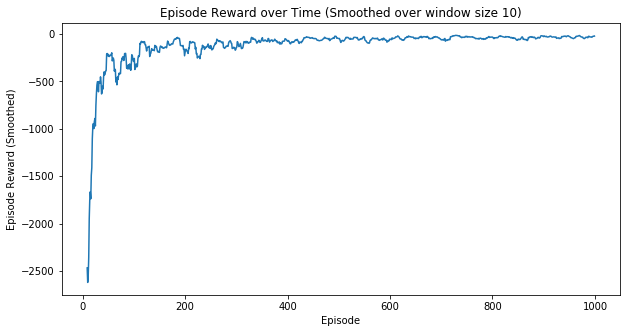

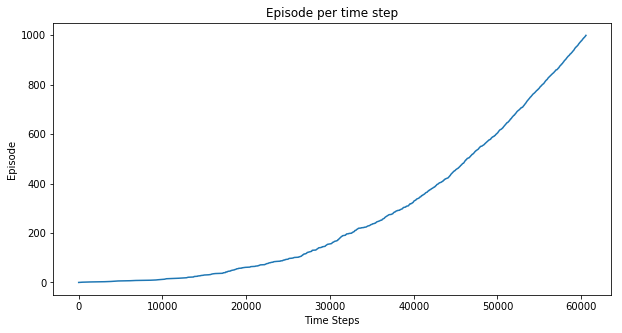

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [41]:
plotting.plot_episode_stats(stats)

In [ ]:
"""Evaluate agent's performance after SARSA"""

total_epochs, total_penalties = 0, 0
episodes = 100

for _ in range(episodes):
    state = env.reset()
    epochs, penalties, reward = 0, 0, 0
    
    done = False
    
    while not done:
        action = np.argmax(q_table[state])
        state, reward, done, info = env.step(action)

        if reward == -10:
            penalties += 1

        epochs += 1

    total_penalties += penalties
    total_epochs += epochs
    clear_output(wait=True)
    print(f"Episode: {_}")
    
print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")

## Frozen-Lake

In [20]:
env = gym.make("FrozenLake8x8-v0").env
env.render()


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


## Q-Learning

In [21]:
import numpy as np
q_table = np.zeros([env.observation_space.n, env.action_space.n])

import random
from IPython.display import clear_output

# Hyperparameters
alpha, alpha_in = 0.5, 0.5
gamma = 0.97
epsilon, epsilon_in = 0.9, 0.9
episodes = 50000

# For plotting metrics
all_epochs = []
all_penalties = []

stats = plotting.EpisodeStats(
        episode_lengths=np.zeros(episodes),
        episode_rewards=np.zeros(episodes))

for i in range(1, episodes):
    state = env.reset()

    epochs, penalties, reward, = 0, 0, 0
    done = False
    
    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(q_table[state]) # Exploit learned values

        next_state, reward, done, info = env.step(action) 
        
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        
        stats.episode_rewards[i] += reward
        stats.episode_lengths[i] = epochs
        
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value

        state = next_state
        epochs += 1
        
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")
        print(f"Alpha: {alpha}")
        print(f"epsilon: {epsilon}")
        print(f"gamma: {gamma}")
        
    if i % 5000 == 0:
        if alpha > 0.005:
            alpha *= alpha_in
        if epsilon > 0.1:
            epsilon *= epsilon_in
        

print("Training finished.\n")

Episode: 49900
Training finished.



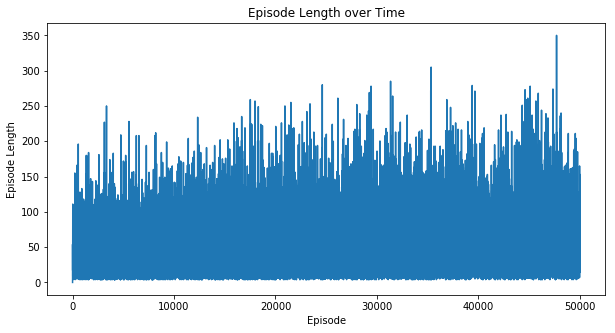

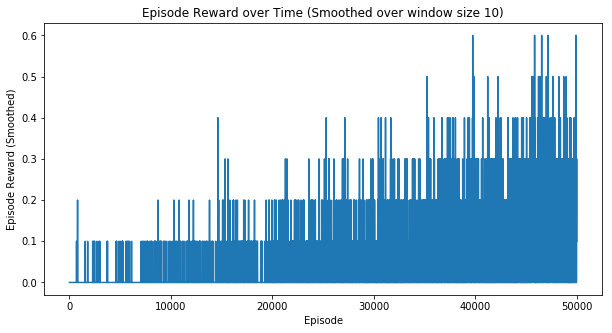

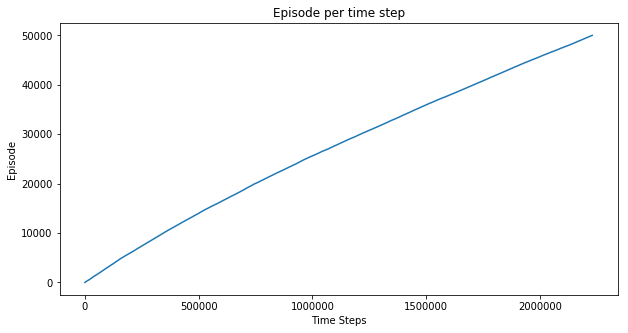

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [22]:
plotting.plot_episode_stats(stats)

In [23]:
"""Evaluate agent's performance after Q-learning"""

total_epochs, total_penalties = 0, 0
episodes = 100

total_reward = 0

for _ in range(episodes):
    state = env.reset()
    epochs, penalties, reward = 0, 0, 0
    
    
    done = False
    
    while not done:
        action = np.argmax(q_table[state])
        state, reward, done, info = env.step(action)
        total_reward += reward

        epochs += 1

    total_penalties += penalties
    total_epochs += epochs
    clear_output(wait=True)
    print(f"Episode: {_}")
    
print(f"Results after {episodes} episodes:")
print(f"Percent of successful paths: {(total_reward / episodes) * 100}")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")

Episode: 99
Results after 100 episodes:
Percent of successful paths: 92.0
Average timesteps per episode: 94.8
Average penalties per episode: 0.0


## SARSA

In [78]:
import numpy as np
q_table = np.zeros([env.observation_space.n, env.action_space.n])
e_table = np.zeros([env.observation_space.n, env.action_space.n]) 

import random
from IPython.display import clear_output

# Hyperparameters
alpha, alpha_in = 0.5, 0.5
gamma = 0.95
epsilon, epsilon_in = 0.9, 0.9
episodes = 50000
lamda = 0.9

# For plotting metrics
all_epochs = []
all_penalties = []

stats = plotting.EpisodeStats(
        episode_lengths=np.zeros(episodes),
        episode_rewards=np.zeros(episodes))

for i in range(1, episodes):
    state = env.reset()

    epochs, penalties, reward, = 0, 0, 0
    done = False
    
    if random.uniform(0, 1) < epsilon:
        action = env.action_space.sample() # Explore action space
    else:
        action = np.argmax(q_table[state]) # Exploit learned values
    
    while not done:

        next_state, reward, done, info = env.step(action)
        stats.episode_rewards[i] += reward
        stats.episode_lengths[i] = epochs
        
        if random.uniform(0, 1) < epsilon:
            next_action = env.action_space.sample() # Explore action space
        else:
            next_action = np.argmax(q_table[next_state]) # Exploit learned values      
        
        e_table[state, action] += 1
        old_value = q_table[state, action]
        new_value = q_table[next_state, next_action]
        
        td_error = (reward + gamma * new_value) - old_value
        q_table = q_table + alpha*td_error*e_table
        e_table = e_table*gamma*lamda
        
        action = next_action
        state = next_state
        epochs += 1
        
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")
        print(f"Alpha: {alpha}")
        print(f"epsilon: {epsilon}")
        print(f"gamma: {gamma}")
        
    if i % 5000 == 0:
        if alpha > 0.005:
            alpha *= alpha_in
        if epsilon > 0.1:
            epsilon *= epsilon_in
        print(f"Alpha: {alpha}")
        print(f"epsilon: {epsilon}")
        print(f"gamma: {gamma}")
    
print("Training finished.\n")

Episode: 49900
Alpha: 0.00390625
epsilon: 0.34867844010000015
gamma: 1
Training finished.



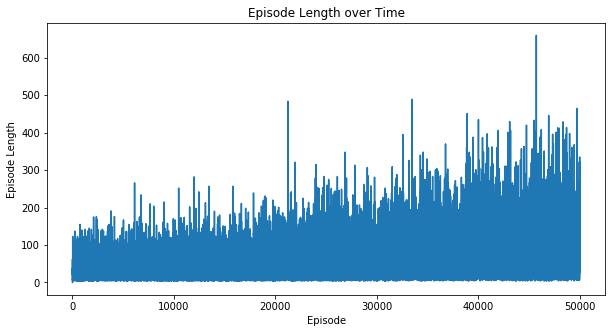

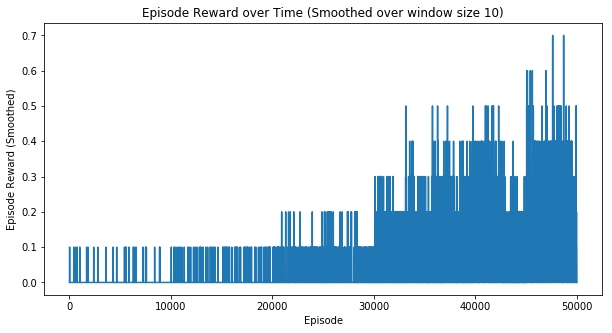

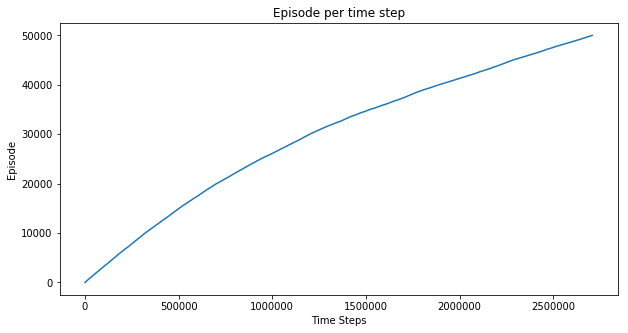

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [79]:
plotting.plot_episode_stats(stats)

In [14]:
"""Evaluate agent's performance after SARSA"""

total_epochs, total_penalties = 0, 0
episodes = 100

total_reward = 0

for _ in range(episodes):
    state = env.reset()
    epochs, penalties, reward = 0, 0, 0
    
    
    done = False
    
    while not done:
        action = np.argmax(q_table[state])
        state, reward, done, info = env.step(action)
        total_reward += reward

        epochs += 1

    total_penalties += penalties
    total_epochs += epochs
    clear_output(wait=True)
    print(f"Episode: {_}")
    
print(f"Results after {episodes} episodes:")
print(f"Percent of successful paths: {(total_reward / episodes) * 100}")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")

IndexError: arrays used as indices must be of integer (or boolean) type

In [13]:
env = gym.make("CartPole-v0").env
env.render()